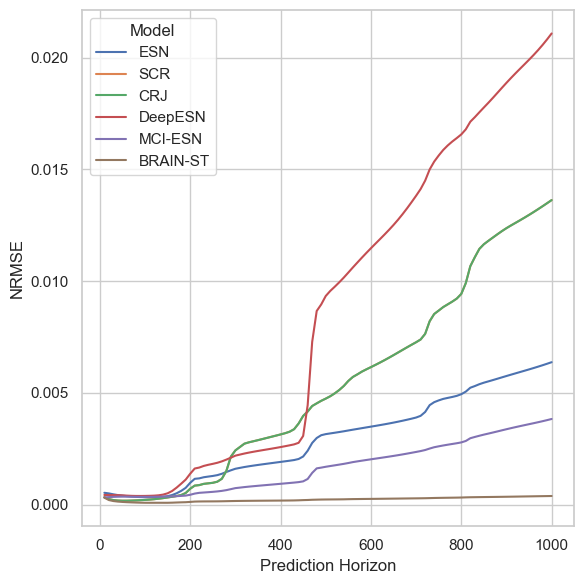

In [3]:
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ─── CONFIG ───────────────────────────────────────────────────────────────
input_files = [
    'fsr/esn_r.json',
    'fsr/cr_r.json',
    'fsr/cr_r.json',
    'fsr/deep_r.json',
    'fsr/mci_r.json',
    # 'fsr_r.json',
    # 'hhlr1_r2.json',
    # 'hhlr2_r2.json',
    'brain-st_r.json'
]  # Replace with actual file paths

model_labels = [
    'ESN',
    'SCR',
    'CRJ',
    'DeepESN',
    'MCI-ESN',
    # 'FSR'
    # 'uHH',
    # 'vHH',
    'BRAIN-ST'
]  # Legend labels (same order as files)

# ─── LOAD AND COMBINE DATA ────────────────────────────────────────────────
all_data = []

for file_path, label in zip(input_files, model_labels):
    with open(file_path, 'r') as f:
        results = json.load(f)

    # Pick first or best result
    result = results[0]  # you can use: min(results, key=lambda x: x['mean_T_VPT'])

    for horizon_str, nrmse in result['mean_NRMSEs'].items():
        all_data.append({
            "Horizon": int(horizon_str),
            "Mean NRMSE": nrmse,
            "Model": label
        })

df = pd.DataFrame(all_data)

# ─── PLOTTING ──────────────────────────────────────────────────────────────
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

sns.lineplot(data=df, x="Horizon", y="Mean NRMSE", hue="Model")

# plt.title("Mean NRMSE vs Prediction Horizon", fontsize=14)
plt.xlabel("Prediction Horizon", fontsize=12)
plt.ylabel("NRMSE", fontsize=12)
plt.legend(title="Model", fontsize=11)
plt.tight_layout()
plt.savefig("Plot_AR_NRMSE_rossler-brain-st.png", dpi=400)
plt.show()